In [31]:
from __future__ import print_function
%matplotlib inline
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

import pandas as pd

In [32]:
rng = numpy.random

In [33]:
# Different parameters for learning
learning_rate = 0.01
training_epochs = 1000
display_step = 100

In [34]:
#import data
df= pd.read_csv("../data/mon.csv")

#divisione train & test set modo 1
#train=df.sample(frac=0.8,random_state=200)
#test=df.drop(train.index)

#divisione train & test set modo 2
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)



In [35]:
train.head(5)

,sys,dys,hr,label
72,120,80,100,0
52,115,75,85,0
17,123,78,90,0
29,120,75,100,0
35,105,78,83,0


In [36]:
#creo train & test set
train_X = train['sys']
train_Y = train['hr']
n_samples = train_X.shape[0]
test_X = test['sys']
test_Y = test['hr']

In [37]:
type(train_X)

pandas.core.series.Series

In [38]:
# Training Data
#train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
#train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
#n_samples = train_X.shape[0]

In [39]:
# Create placeholder for providing inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [40]:
# create weights and bias and initialize with random number
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [41]:
# Construct a linear model using Y=WX+b
pred = tf.add(tf.mul(X, W), b)

In [42]:
# Calculate Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [43]:
# Gradient descent to minimize mean sequare error
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [44]:
# Initializing the variables
# init = tf.initialize_all_variables
init = tf.global_variables_initializer()

Training started
Epoch: 0100 cost= 122.650779724 W= 0.875513 b= -0.611832
Epoch: 0200 cost= 122.717140198 W= 0.871895 b= -0.13174
Epoch: 0300 cost= 122.785285950 W= 0.868306 b= 0.344458
Epoch: 0400 cost= 122.855331421 W= 0.864747 b= 0.816792
Epoch: 0500 cost= 122.927017212 W= 0.861216 b= 1.2853
Epoch: 0600 cost= 123.000633240 W= 0.857714 b= 1.75
Epoch: 0700 cost= 123.075630188 W= 0.85424 b= 2.21094
Epoch: 0800 cost= 123.152671814 W= 0.850795 b= 2.66815
Epoch: 0900 cost= 123.230827332 W= 0.847377 b= 3.12163
Epoch: 1000 cost= 123.310905457 W= 0.843987 b= 3.57143
Training completed
Training cost= 123.311 W= 0.843987 b= 3.57143 

Testing started
Calculate Mean square error
Testing cost= 87.6273
Absolute mean square loss difference: 35.6836


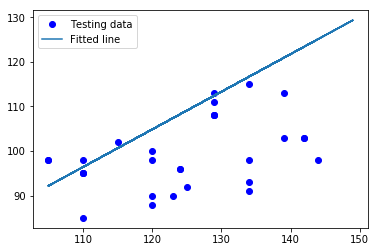

In [45]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print("Training started")

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            #create small batch of trining and testing data and feed it to model
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display training information after each N step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Training completed")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    # Testing 
    print("Testing started")
    #test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    #test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
    #Calculate Mean square error
    print("Calculate Mean square error")
    testing_cost = sess.run(tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * test_X.shape[0]),feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost))
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()